In [1]:
#This notebook is just for installing NLKT 

In [307]:
from nltk.tokenize import word_tokenize


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
from wordcloud import WordCloud 
from collections import Counter
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

pd.set_option("display.max_rows", None, "display.max_columns", None,'display.max_colwidth', None)

In [2]:
import nltk

In [319]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
pip install tweepy

     |████████████████████████████████| 63 kB 1.2 MB/s eta 0:00:011
     |████████████████████████████████| 146 kB 7.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tweepy

# Initializing the app and connecting to Twitter

In [6]:
twitter_keys = {
        'consumer_key':        'ZEGh5LcJDbOuJR7fI0lwudKV3',
        'consumer_secret':     'KsNLlSLFrk16T0s84etFdDFvcfYs0spw9aP0VS6paWKnJsAW0n',
        'access_token_key':    '56595803-LK6NsUZQPoyRUdD3pZHnQOORAgfCObtUcAqK4uLcP',
        'access_token_secret': '2r6zv1GdUGzJwUsfh8acchiKeQtxCsrtvB9lseocSDWjz'
    }

#Setup access to API
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])

api = tweepy.API(auth)

#Make call on home timeline, print each tweets text
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

RT @DCbuild3r: I'm creating a list of people helping scale Ethereum for my upcoming article, can you please recommend all the people that f…
¿Y si nos hacen a todos un favor y dejan de citar el Tweet del enfermo disfrazado de cura pedófilo?
Nos sentimos conectados con las personas que están lejos gracias al internet, pero cada vez nos desconectamos más d… https://t.co/cZCtoiccuo
New York City - next Forward Tour event is on November 13th at the City Winery!  The smartest date night ever!  😀👍 https://t.co/0s8g3bZ9KR
RT @OlympusAgora: ICYMI: Agora TV EP. 5  

We brought on the legend @sassal0x to talk everything Ethereum: The merge, L2 solutions, L1 comp…
En Puerto Cabello se siente la energía del eje costero de nuestro estado.
Damos la cara a nuestros vecinos para dec… https://t.co/xHPDVhfcfa
The last week in Ethereum:

-@optimismPBC details EVM equivalence 👍
-@AcrossProtocol announced 🌉
-@PhononDAO introd… https://t.co/R8Nkon1IaP
RT @ensdomains: ENS is decentralizing governance &amp; i

In [7]:
#That was the first call, it worked, now, gonna check the JSON of the first tweet

In [9]:
#Ok, as the output of this was crazy, we will have to use some tricks to have an easier to understand output. 

# Making the output readible. 

In [10]:
import json 

status = public_tweets[0]

#convert to string
json_str = json.dumps(status._json)

#deserialise string into python object
parsed = json.loads(json_str)

print(json.dumps(parsed, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Nov 01 23:46:46 +0000 2021",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 848628608738488321,
                "id_str": "848628608738488321",
                "indices": [
                    3,
                    13
                ],
                "name": "dcbuilder.eth \ud83e\udd87\ud83d\udd0a\ud83d\udc3c (3,3) (\ud83c\udf33,\ud83c\udf33)\u253b\u2533",
                "screen_name": "DCbuild3r"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 1455320439689867267,
    "id_str": "1455320439689867267",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": null,
    "

In [11]:
status.text

"RT @DCbuild3r: I'm creating a list of people helping scale Ethereum for my upcoming article, can you please recommend all the people that f…"

# Using the code from this article: https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25

In [18]:
class TweetMiner(object):

    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        'ZEGh5LcJDbOuJR7fI0lwudKV3',
        'consumer_secret':     'KsNLlSLFrk16T0s84etFdDFvcfYs0spw9aP0VS6paWKnJsAW0n',
        'access_token_key':    '56595803-LK6NsUZQPoyRUdD3pZHnQOORAgfCObtUcAqK4uLcP',
        'access_token_secret': '2r6zv1GdUGzJwUsfh8acchiKeQtxCsrtvB9lseocSDWjz'
}
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 20):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="dril", #BECAUSE WHO ELSE!
                         mine_rewteets=False,
                         max_pages=5, 
                         query):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =  self.api.search(q = query, self.result_limit) 
            else:
                statuses   =  self.api.search(q = query, self.result_limit)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'name':            item.user.name,
                    'screen_name':     item.user.screen_name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.full_text,
                   #'retweet_text':    item.retweeted_status.full_text, ##throws error when not present
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                    'favourite_count': item.favorite_count,
                    'hashtags':        item.entities['hashtags'],
                    'status_count':    item.user.statuses_count,
                    'location':        item.place,
                    'source_device':   item.source
                }
                
                try:
                    mined['retweet_text'] = item.retweeted_status.full_text
                except:
                    mined['retweet_text'] = 'None'
                try:
                    mined['quote_text'] = item.quoted_status.full_text
                    mined['quote_screen_name'] = status.quoted_status.user.screen_name
                except:
                    mined['quote_text'] = 'None'
                    mined['quote_screen_name'] = 'None'
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data

SyntaxError: non-default argument follows default argument (<ipython-input-18-92d1d54f7dc7>, line 28)

In [ ]:
query = '#wornwear'

In [ ]:
fetched_tweets = self.api.search(q = query, count = count)

In [21]:
pip install textblob

     |████████████████████████████████| 636 kB 7.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Trying this article now. https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f 

In [47]:
# Function created to extract coordinates from tweet if it has coordinate info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_coordinates(row):
    if row['Tweet Coordinates']:
        return row['Tweet Coordinates']['coordinates']
    else:
        return None
# Function created to extract place such as city, state or country from tweet if it has place info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_place(row):
    if row['Place Info']:
        return row['Place Info'].full_name
    else:
        return None

In [50]:
username = 'BillGates'
max_tweets = 150
 
# Creation of query method using parameters
tweets = tweepy.Cursor(api.user_timeline, screen_name=username, tweet_mode='extended').items(max_tweets)
 
# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.screen_name, tweet.coordinates, tweet.place, tweet.retweet_count, tweet.favorite_count, tweet.lang, tweet.source, tweet.in_reply_to_status_id_str, tweet.in_reply_to_user_id_str, tweet.is_quote_status] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Did not include column names to simplify code 
tweets_df = pd.DataFrame(tweets_list)


In [53]:
tweets_df[0]

0      .@Breakthrough Energy Catalyst is bringing tog...
1      Unless smallholder farmers can adapt to climat...
2      Thank you, @vonderleyen. This $1B partnership ...
3      RT @narendramodi: Had an excellent meeting wit...
4      Encouraged to discuss with PM @narendramodi on...
                             ...                        
145    These young leaders make me optimistic that br...
146    Against the odds, @MohamedBailorB8 became a do...
147    This is an important step in the U.S. clean en...
148    Heroes like Dr. Mohamed Barrie are the reason ...
149    RT @MSuzman: Promising news from the @Gavi #CO...
Name: 0, Length: 150, dtype: object

In [54]:
#Ok, this is working at least to get the tweets from an username. Let's try now with the Search_query. 

In [161]:
#text_query = '#wornwear -filter:links'
text_query = 'pat'
max_tweets = 50
 
# Creation of query method using parameters
tweets = tweepy.Cursor(api.search_tweets,q=text_query, tweet_mode ='extended', lang='en' ).items(max_tweets)
 
# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.name, tweet.user.screen_name, tweet.user.id_str, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.user.listed_count, tweet.user.created_at, tweet.user.profile_image_url_https, tweet.user.default_profile, tweet.user.default_profile_image] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Did not include column names to simplify code 
tweets_df2 = pd.DataFrame(tweets_list)

In [162]:
tweets_df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,En el marco de los programas #PreViaje y #Club...,2021-11-02 22:41:19+00:00,1455666360357474313,Ministerio de Turismo y Deportes,TurDepAR,1206615887446499329,"Buenos Aires, Argentina",https://t.co/8v3NhC4t24,Cuenta oficial del Ministerio de Turismo y Dep...,True,22548,68,59,2353,118,2019-12-16 16:43:48+00:00,https://pbs.twimg.com/profile_images/141748384...,True,False
1,RT @jason_kint: It’s worth noting along with t...,2021-11-02 22:40:27+00:00,1455666139573411845,Lindsay 😷 'vaccination is lifesaving',LindsayGrace019,936351742144466944,USA,None,Reality. Pro-democracy. 🇺🇲\n#RankedChoiceVotin...,False,137,2048,62219,12034,0,2017-11-30 21:50:26+00:00,https://pbs.twimg.com/profile_images/953656533...,True,False
2,@EnronChairman @litcapital Pretty sure I have ...,2021-11-02 22:40:23+00:00,1455666122464845824,Flux,FluxTrades,1356417487563292672,,https://t.co/ACr9a1f1D5,"Options, Memes, and Due Diligence. Perma Bull....",False,395,77,853,445,4,2021-02-02 01:41:49+00:00,https://pbs.twimg.com/profile_images/137202753...,True,False
3,#HistoriasMigrantes Maiby Moreno siente que se...,2021-11-02 22:40:00+00:00,1455666026238992389,Venezuela Migrante,venezuela_migra,1254835566702665728,Venezuela,https://t.co/hoRNcNKQxY,Somos un servicio de comunicación para los mig...,False,13261,470,567,13408,57,2020-04-27 18:11:34+00:00,https://pbs.twimg.com/profile_images/134101206...,True,False
4,"Top work from Patagonia, as always https://t.c...",2021-11-02 22:39:54+00:00,1455666001278816259,Wayne Singleton,SingletonWayne,384859926,Lake District National Park,https://t.co/U0LfCWYEtR,"The Running Concierge. @joggingpals Owner, UKA...",False,2432,3647,33572,31363,38,2011-10-04 13:15:59+00:00,https://pbs.twimg.com/profile_images/140779391...,True,False
5,Y si... cuándo pones gente no idónea pasan cos...,2021-11-02 22:39:45+00:00,1455665965673242627,Monoooo,monoypoesia,743316601,Argentina,None,Abracadabralogico,False,100,128,18776,17877,0,2012-08-07 17:12:25+00:00,https://pbs.twimg.com/profile_images/926294480...,False,False
6,Los K se robaron media patagonia pero los deli...,2021-11-02 22:39:42+00:00,1455665953111412737,Axel Portillo,axelportillo9,2226786300,Ciudad Autónoma de Buenos Aire,None,"Web Developer, UCES | Abogacía, UBA",False,1607,1096,9110,1820,2,2013-12-02 14:51:48+00:00,https://pbs.twimg.com/profile_images/133796706...,False,False
7,¿Por qué parques nacionales?: Fundación Mustak...,2021-11-02 22:39:11+00:00,1455665822920318976,Fundación Mustakis,fundmustakis,232221001,Chile,https://t.co/DIabG1uwo4,Entregamos oportunidades y experiencias transf...,False,6750,4258,6562,8131,56,2010-12-30 15:26:10+00:00,https://pbs.twimg.com/profile_images/125008574...,False,False
8,RT @patagoniaeurope: Join Patagonia grantee Th...,2021-11-02 22:39:00+00:00,1455665775985967107,Vivian Maeda,blippingbird,212646190,Scotland,https://t.co/nmviiSulRt,"Proud mum of Luca and Matti- 9 x marathons, Co...",False,1673,2243,20118,15917,99,2010-11-06 17:09:57+00:00,https://pbs.twimg.com/profile_images/644536758...,False,False
9,RT @MatiasLammens: Con el impulso del turismo ...,2021-11-02 22:37:57+00:00,1455665512067710976,Darío Martínez,dariomartinezpj,701791659575681024,"Neuquén, Argentina",https://t.co/jcabykT5VB,Secretario de Energía de la Nación. #Argentina...,False,10135,1067,2800,5482,74,2016-02-22 15:32:25+00:00,https://pbs.twimg.com/profile_images/137489033...,True,False


In [163]:
tweets_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   0       50 non-null     object             
 1   1       50 non-null     datetime64[ns, UTC]
 2   2       50 non-null     object             
 3   3       50 non-null     object             
 4   4       50 non-null     object             
 5   5       50 non-null     object             
 6   6       50 non-null     object             
 7   7       15 non-null     object             
 8   8       50 non-null     object             
 9   9       50 non-null     bool               
 10  10      50 non-null     int64              
 11  11      50 non-null     int64              
 12  12      50 non-null     int64              
 13  13      50 non-null     int64              
 14  14      50 non-null     int64              
 15  15      50 non-null     datetime64[ns, UTC]
 16  16      50

0    @Assud_ Hi there! If you're located in the US ...
1      https://t.co/D6eXcwxW8Q https://t.co/qRxu4bh39o
2    see https://t.co/D6eXcwxW8Q\nfor those of us w...
3    See https://t.co/05W1BfJBXe\nthey take trade-i...
4    @regress2themean @patagonia @brooklynmarie Che...
5    RT @patagonia: Trade It In, Get Credit. That P...
6    Patagonia is an ethical company. They make qua...
Name: 0, dtype: object

# Below this point is when I actually get the tweets. 

#Trying the most complicated link 
https://twitter.com/search?q=(%23wornwear)%20-filter%3Alinks%20-filter%3Areplies%20lang%3Aen&src=typed_query&f=live
    

In [210]:
#Trying with snscrape https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af

In [164]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/25/y7jtsd6j45z4_cfzl2xbkycr0000gp/T/pip-req-build-tupyn0ma
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/25/y7jtsd6j45z4_cfzl2xbkycr0000gp/T/pip-req-build-tupyn0ma
  Created wheel for snscrape: filename=snscrape-0.3.5.dev138+ga6b6f3f-py3-none-any.whl size=51833 sha256=557520bc6c8c1f312a5bf7f36275663fcc3f2db8b4c0cb79c3095600da4b259a
  Stored in directory: /private/var/folders/25/y7jtsd6j45z4_cfzl2xbkycr0000gp/T/pip-ephem-wheel-cache-hlkq02xx/wheels/92/42/87/33fa9b18f7a75d02643a9ca3743339aec9be28c6796267c7d8
Successfully built snscrape
Note: you may need to restart the kernel to use updated packages.


In [178]:
import os

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 1500 --since 2010-01-01 twitter-search 'wornwear -filter:links lang:en until:2016-07-31' > text-query-tweets.json")

0

In [173]:
 #Reads the json generated from the CLI commands above and creates a pandas dataframe
tweets_df = pd.read_json('text-query-tweets.json', lines=True)

In [174]:
tweets_df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/lynn32187/status/141103715...,2021-07-02 19:00:47+00:00,@Melissa4HD20 Why I do most of our shopping wi...,@Melissa4HD20 Why I do most of our shopping wi...,1411037150288650243,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,NaN,1.410980e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/MikeLantigua/status/140748...,2021-06-22 23:45:37+00:00,@LoriMDennis @patagonia @WornWear A bargain,@LoriMDennis @patagonia @WornWear A bargain,1407484953714176001,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,1.407484e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/rachelvetica/status/140446...,2021-06-14 15:30:28+00:00,@82_Streetcar Caveat is that it's discontinued...,@82_Streetcar Caveat is that it's discontinued...,1404461244506120193,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,NaN,1.404461e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/culligan_thomas/status/139...,2021-05-26 19:33:10+00:00,Nothing better that finding something on @Worn...,Nothing better that finding something on @Worn...,1397636951486914565,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[buylessdemandmore],NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/KatieRedvoteblu/status/139...,2021-05-23 21:04:35+00:00,@lynn32187 @MasterOfMoxie @Dist_5 @dianerocks5...,@lynn32187 @MasterOfMoxie @Dist_5 @dianerocks5...,1396572793001627660,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,NaN,1.396512e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN


In [176]:
tweets_df.content

0      @Melissa4HD20 Why I do most of our shopping wi...
1            @LoriMDennis @patagonia @WornWear A bargain
2      @82_Streetcar Caveat is that it's discontinued...
3      Nothing better that finding something on @Worn...
4      @lynn32187 @MasterOfMoxie @Dist_5 @dianerocks5...
                             ...                        
495    @badassbeckyshow Why wouldn't they? ;-) You ge...
496    We've just purchased our first bits of stock f...
497    @caseyslink @patagonia Lots of hippies drinkin...
498    Thanks @patagonia for the  #wornwear repair on...
499    "If you don't like patches you can kiss my ass...
Name: content, Length: 500, dtype: object

In [179]:
tweets_dfsns = pd.read_json('text-query-tweets.json', lines=True)

In [335]:
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 2500 --since 2008-01-01 twitter-search 'wornwear lang:en until:2021-07-31' > text-query-tweets.json")

0

In [336]:
tweetsdf = pd.read_json('text-query-tweets.json', lines=True)

In [337]:
tweetsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             2500 non-null   object             
 1   url               2500 non-null   object             
 2   date              2500 non-null   datetime64[ns, UTC]
 3   content           2500 non-null   object             
 4   renderedContent   2500 non-null   object             
 5   id                2500 non-null   int64              
 6   user              2500 non-null   object             
 7   replyCount        2500 non-null   int64              
 8   retweetCount      2500 non-null   int64              
 9   likeCount         2500 non-null   int64              
 10  quoteCount        2500 non-null   int64              
 11  conversationId    2500 non-null   int64              
 12  lang              2500 non-null   object             
 13  sou

In [338]:
tweetsdf.sample(5)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
1940,snscrape.modules.twitter.Tweet,https://twitter.com/ThriftyCloset22/status/670364135738077184,2015-11-27 22:10:39+00:00,"I just listed 'Mountain Hardwear Absolute Zero Jacket, Lar' on eBay. Check it out. #thrifting #wornwear #patagonia https://t.co/MPgMrzlOkg","I just listed 'Mountain Hardwear Absolute Zero Jacket, Lar' on eBay. Check it out. #thrifting #wornwear #patagonia iwascoding.com/cgi-bin/viewAu…",670364135738077184,"{'_type': 'snscrape.modules.twitter.User', 'username': 'ThriftyCloset22', 'id': 3082674987, 'displayname': 'TheAdventurousCloset', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2015-03-09T22:55:08+00:00', 'followersCount': 8, 'friendsCount': 48, 'statusesCount': 183, 'favouritesCount': 0, 'listedCount': 0, 'mediaCount': 1, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/575068843208413185/KIJn_VjE_normal.jpeg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/ThriftyCloset22'}",0,0,0,0,670364135738077184,en,"<a href=""https://www.iwascoding.com/GarageSale/index.html"" rel=""nofollow"">GarageSale</a>",https://www.iwascoding.com/GarageSale/index.html,GarageSale,[http://www.iwascoding.com/cgi-bin/viewAuction.cgi?siteID=0&itemID=221952890159],[https://t.co/MPgMrzlOkg],None,NaN,None,NaN,None,None,None,None,"[thrifting, wornwear, patagonia]",NaN
1319,snscrape.modules.twitter.Tweet,https://twitter.com/_SilviyaDineva/status/812268304542875649,2016-12-23 12:07:09+00:00,"you are just FANTASTIC, guys !!! https://t.co/pzSNzJ6BfT &lt;&lt; @patagonia #WornWear","you are just FANTASTIC, guys !!! eu.patagonia.com/enNL/worn-wear/ &lt;&lt; @patagonia #WornWear",812268304542875649,"{'_type': 'snscrape.modules.twitter.User', 'username': '_SilviyaDineva', 'id': 129946725, 'displayname': 'Silviya Dineva', 'description': 'Handling e-commerce content at scale. Having fun with b2b marketing, operations, teams. Jazz too.', 'rawDescription': 'Handling e-commerce content at scale. Having fun with b2b marketing, operations, teams. Jazz too.', 'descriptionUrls': None, 'verified': False, 'created': '2010-04-05T21:55:18+00:00', 'followersCount': 620, 'friendsCount': 1947, 'statusesCount': 2414, 'favouritesCount': 1676, 'listedCount': 160, 'mediaCount': 89, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/795914549232857088/8m8dzkE4_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/_SilviyaDineva'}",0,0,0,0,812268304542875649,en,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",http://twitter.com,Twitter Web Client,[http://eu.patagonia.com/enNL/worn-wear/],[https://t.co/pzSNzJ6BfT],None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'username': 'patagonia', 'id': 16191793, 'displayname': 'Patagonia', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/patagonia'}]",None,None,[WornWear],NaN
2148,snscrape.modules.twitter.Tweet,https://twitter.com/ThriftyCloset22/status/630537747078320129,2015-08-10 00:34:48+00:00,"I just listed 'Patagonia synchilla hooded pullover, Mens S' on eBay. Check it out. #thrifting #wornwear #patagonia http://t.co/Vfs3pUYoDp","I just listed 'Patagonia synchilla hooded pullover, Mens S' on eB

In [339]:
tweetsdf.date

0      2021-07-02 19:00:47+00:00
1      2021-06-28 21:34:56+00:00
2      2021-06-24 18:52:42+00:00
3      2021-06-22 23:45:37+00:00
4      2021-06-22 23:41:05+00:00
5      2021-06-15 15:54:22+00:00
6      2021-06-14 15:30:28+00:00
7      2021-05-23 21:04:35+00:00
8      2021-05-23 17:02:18+00:00
9      2021-05-21 16:20:29+00:00
10     2021-05-14 16:41:57+00:00
11     2021-05-14 13:52:01+00:00
12     2021-05-14 01:16:21+00:00
13     2021-05-14 00:39:17+00:00
14     2021-05-13 01:04:33+00:00
15     2021-05-08 18:28:44+00:00
16     2021-05-06 16:41:34+00:00
17     2021-05-06 02:17:23+00:00
18     2021-05-06 02:16:05+00:00
19     2021-04-23 02:14:08+00:00
20     2021-04-23 02:10:12+00:00
21     2021-04-23 02:06:16+00:00
22     2021-04-19 19:39:52+00:00
23     2021-04-18 19:49:59+00:00
24     2021-04-12 15:07:22+00:00
25     2021-04-10 22:42:04+00:00
26     2021-04-08 23:47:54+00:00
27     2021-04-08 16:28:56+00:00
28     2021-04-08 14:43:04+00:00
29     2021-04-07 22:47:17+00:00
30     202

In [340]:
#Let's try to pull some more, just in case that I have to do some serious cleaning. 

In [341]:
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 2500 --since 2008-01-01 twitter-search 'wornwear lang:en until:2015-04-16' > text-query-tweets2.json")

0

In [342]:
tweetsdf2 = pd.read_json('text-query-tweets2.json', lines=True)

In [343]:
tweetsdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             1372 non-null   object             
 1   url               1372 non-null   object             
 2   date              1372 non-null   datetime64[ns, UTC]
 3   content           1372 non-null   object             
 4   renderedContent   1372 non-null   object             
 5   id                1372 non-null   int64              
 6   user              1372 non-null   object             
 7   replyCount        1372 non-null   int64              
 8   retweetCount      1372 non-null   int64              
 9   likeCount         1372 non-null   int64              
 10  quoteCount        1372 non-null   int64              
 11  conversationId    1372 non-null   int64              
 12  lang              1372 non-null   object             
 13  sou

# Concatenating the tweets from 2008 to 2015 and 2015 to 2021 

In [344]:
df = pd.concat([tweetsdf, tweetsdf2], axis=0)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3872 entries, 0 to 1371
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             3872 non-null   object             
 1   url               3872 non-null   object             
 2   date              3872 non-null   datetime64[ns, UTC]
 3   content           3872 non-null   object             
 4   renderedContent   3872 non-null   object             
 5   id                3872 non-null   int64              
 6   user              3872 non-null   object             
 7   replyCount        3872 non-null   int64              
 8   retweetCount      3872 non-null   int64              
 9   likeCount         3872 non-null   int64              
 10  quoteCount        3872 non-null   int64              
 11  conversationId    3872 non-null   int64              
 12  lang              3872 non-null   object             
 13  sou

# Gonna create a CSV file, and then open it on another notebook. 

In [346]:
df.to_csv('rawtweets.csv')

In [200]:
docs= df.content

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [206]:
vc = CountVectorizer(stop_words='english')

In [207]:
doc_term = vc.fit_transform(docs)

In [208]:
vc.vocabulary_

{'melissa4hd20': 5923,
 'shopping': 8432,
 'rei': 7763,
 'patagonia': 6920,
 'wornwear': 10339,
 'fleece': 3627,
 '25': 210,
 'yrs': 10674,
 'didn': 2710,
 'need': 6311,
 'huge': 4508,
 'repair': 7806,
 'thanks': 9154,
 'got': 4050,
 'fixed': 3589,
 'returned': 7905,
 'ready': 7676,
 'campouts': 1819,
 'use': 9733,
 'win': 10239,
 'https': 4499,
 'wqospxxvpt': 10356,
 'studio': 8846,
 'sweater': 8953,
 '13': 77,
 'years': 10592,
 'honestly': 4443,
 'sure': 8902,
 'write': 10366,
 'artist': 1118,
 'statement': 8770,
 'exhibition': 3319,
 'proposal': 7349,
 'cape': 1839,
 'shield': 8410,
 'snuggie': 8585,
 'thank': 9152,
 'sarah_gilman': 8182,
 'grateful': 4090,
 'darn': 2559,
 'good': 4027,
 'friends': 3759,
 'velocitymadegood': 9876,
 'ck5swqozlt': 2071,
 'lorimdennis': 5644,
 'bargain': 1305,
 'finally': 3555,
 'test': 9121,
 'new': 6334,
 'raincoat': 7630,
 'amp': 1008,
 'results': 7892,
 'stellar': 8781,
 'letting': 5471,
 'swap': 8947,
 'gently': 3915,
 'used': 9734,
 'items': 4824

In [209]:
pd.unique(doc_term.toarray().reshape(-1))

array([0, 1, 2, 3, 4, 6, 5, 9])

In [214]:
#Creating a function to clean the tweets    https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e

In [213]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [218]:
df['content'] = clean_tweets(df['content'])

In [332]:
df.sample(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,wc,cleaned,tokens
227,snscrape.modules.twitter.Tweet,https://twitter.com/TrashPandaFTW/status/1362621836362534912,2021-02-19 04:35:36+00:00,@patagonia @tedcruz @WornWear there is no detergent that can wash off ted cruz,@patagonia @tedcruz @WornWear there is no detergent that can wash off ted cruz,1362621836362534912,"{'_type': 'snscrape.modules.twitter.User', 'username': 'TrashPandaFTW', 'id': 62103640, 'displayname': 'Dad Jokes Panda', 'description': 'I make bad jokes that I laugh at. You get what you pay for if you follow me 😱', 'rawDescription': 'I make bad jokes that I laugh at. You get what you pay for if you follow me 😱', 'descriptionUrls': None, 'verified': False, 'created': '2009-08-01T19:46:45+00:00', 'followersCount': 3067, 'friendsCount': 811, 'statusesCount': 44713, 'favouritesCount': 83395, 'listedCount': 10, 'mediaCount': 1554, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/922995393452896256/IpaVBGxW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/62103640/1567385225', 'label': None, 'url': 'https://twitter.com/TrashPandaFTW'}",0,1,64,0,1362510799718150146,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",https://mobile.twitter.com,Twitter Web App,None,None,None,NaN,None,1.362511e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'patagonia', 'id': 16191793, 'displayname': 'Patagonia', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/patagonia'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'patagonia', 'id': 16191793, 'displayname': 'Patagonia', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/patagonia'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'tedcruz', 'id': 23022687, 'displayname': 'Ted Cruz', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/tedcruz'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'WornWear', 'id': 1363098550230519809, 'displayname': 'Worn Wear', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/WornWear'}]",None,None,None,NaN,13,there is no detergent that can wash off ted cruz,"[there, is, no, detergent, that, can, wash, off, ted, cruz]"
1205,snscrape.modules.twitter.Tweet,https://twitter.com/LeiaOh/status/405105428754731008,2013

In [347]:
df.content.duplicated().sum()

6

In [229]:
tweetslist = df.content

In [230]:
tweetslist

0              Why I do most of our shopping with    and 
1        \nHad this fleece for at least 25 yrs.  Didn’...
2       this has been my studio sweater for 13 years. ...
3                                               A bargain
4       Finally got to test out my new (to me) raincoa...
                              ...                        
1367    Give your clothing a 2nd/3rd/4th+ chance!  wor...
1368    wornwear: The Grandfather Yvon Chouinard, Vent...
1369    wornwear: The Grandfather Yvon Chouinard, Vent...
1370    No surprise that  nails this  campaign #WornWe...
1371    Inspiring stories about people who love their ...
Name: content, Length: 3872, dtype: object

In [237]:
df.drop_duplicates(subset ="content",
                     keep = 'last', inplace = True)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3866 entries, 0 to 1371
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             3866 non-null   object             
 1   url               3866 non-null   object             
 2   date              3866 non-null   datetime64[ns, UTC]
 3   content           3866 non-null   object             
 4   renderedContent   3866 non-null   object             
 5   id                3866 non-null   int64              
 6   user              3866 non-null   object             
 7   replyCount        3866 non-null   int64              
 8   retweetCount      3866 non-null   int64              
 9   likeCount         3866 non-null   int64              
 10  quoteCount        3866 non-null   int64              
 11  conversationId    3866 non-null   int64              
 12  lang              3866 non-null   object             
 13  sou

In [251]:
df.content.nunique()

3866

In [265]:
#Creating a new column with the number of words in a tweet.  https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb
def word_count(sentence):
    return len(sentence.split())
    
df['wc'] = df['content'].apply(word_count)

In [267]:
df.wc.describe()

count    3866.000000
mean       17.686239
std         8.431697
min         3.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        61.000000
Name: wc, dtype: float64

In [268]:
#Now, getting the most common words on the tweets.
# get most common words in training dataset
all_words = []
for line in list(df.content):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    


In [331]:
Counter(all_words).most_common(20)

[('.', 2628),
 ('the', 1952),
 (',', 1625),
 ('to', 1330),
 ('!', 1193),
 ('a', 1029),
 ('and', 1017),
 ('for', 836),
 ('it', 811),
 ('i', 775),
 ('of', 763),
 ('on', 730),
 (':', 723),
 ('you', 702),
 ('in', 651),
 ('is', 573),
 ('patagonia', 515),
 ('at', 488),
 ('this', 482),
 ('wornwear', 480)]

In [274]:
#Definitely need to include @patagonia, #wornwear, @wornwear, #patagonia, patagonia, &amp, to the stopwords

In [278]:
#A function to get rid of some undesired characters.
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [279]:
df['cleaned'] = df.content.apply(processTweet)

In [283]:
def wcounter(pdseries):
    all_words = []
    for line in list(pdseries):
        words = line.split()
        for word in words:
            all_words.append(word.lower())
    print (Counter(all_words).most_common(10))

In [284]:
wcounter(df.content)

[('#wornwear', 2799), ('the', 1935), ('@patagonia', 1800), ('to', 1324), ('a', 1022), ('and', 1007), ('for', 823), ('of', 759), ('on', 723), ('i', 640)]


In [285]:
wcounter(df.cleaned)

[('the', 1926), ('to', 1318), ('a', 1020), ('and', 994), ('for', 821), ('of', 758), ('on', 721), ('i', 639), ('in', 637), ('you', 608)]


In [286]:
#Comparing the before and after doing some cleaning on the text data. 

In [289]:
#Trying to create a simple wordcloud from the df.cleaned 

In [311]:
#Now, creating a tokenized version out of the df.cleaned.
df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['cleaned']), axis=1)

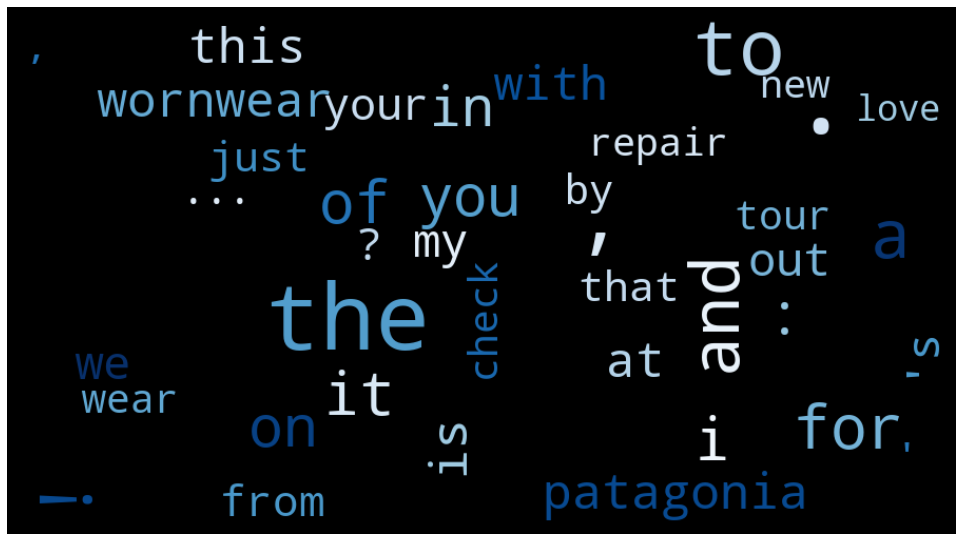

In [330]:
# split sentences to get individual words
all_words = []
for line in (df.tokens): # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=40,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap= 'Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [317]:
all_words

['why',
 'i',
 'do',
 'most',
 'of',
 'our',
 'shopping',
 'with',
 'and',
 'had',
 'this',
 'fleece',
 'for',
 'at',
 'least',
 '25',
 'yrs',
 '.',
 'didn',
 '’',
 't',
 'need',
 'a',
 'huge',
 'repair',
 ',',
 'but',
 'thanks',
 'to',
 'i',
 'got',
 'it',
 'fixed',
 ',',
 'and',
 'returned',
 '.',
 'it',
 '’',
 's',
 'ready',
 'for',
 'more',
 'campouts',
 'and',
 'use',
 'out',
 'and',
 'about',
 '.',
 'patagonia',
 'for',
 'the',
 'win',
 '.',
 'this',
 'has',
 'been',
 'my',
 'studio',
 'sweater',
 'for',
 '13',
 'years',
 '.',
 'honestly',
 ',',
 'i',
 "'m",
 'not',
 'sure',
 'i',
 'could',
 'write',
 'an',
 'artist',
 'statement',
 'or',
 'exhibition',
 'proposal',
 'without',
 'it',
 '.',
 'it',
 "'s",
 'my',
 'cape',
 ',',
 'my',
 'shield',
 ',',
 'and',
 'my',
 'snuggie',
 '.',
 'thank',
 'you',
 ',',
 '.',
 'grateful',
 'for',
 'my',
 'darn',
 'good',
 'friends',
 '.',
 'a',
 'bargain',
 'finally',
 'got',
 'to',
 'test',
 'out',
 'my',
 'new',
 '(',
 'to',
 'me',
 ')',
 'ra

In [294]:
pip install wordcloud

     |████████████████████████████████| 220 kB 7.4 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158428 sha256=d64bff1394d2bb2844bf65b412d99d0247f2924d4282ffd9572ef48852271793
  Stored in directory: /Users/robertolinares/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [318]:
#This is gonna be a wrap for the day, I feel satisfied with the results so far, but looking forward to put some more work tomorrow, friday and the weekend. 

In [ ]:
#From the topic interpretation module. 

In [320]:
corpus = df.cleaned

In [323]:
tfidf = TfidfVectorizer(stop_words='english')

tweet_word_matrix = tfidf.fit_transform(corpus)

vocab = tfidf.get_feature_names()

In [324]:
vocab

['000',
 '01',
 '03',
 '0405',
 '086',
 '09',
 '10',
 '100',
 '1000',
 '101',
 '103',
 '10a',
 '10am',
 '10th',
 '10yo',
 '11',
 '11am',
 '12',
 '120',
 '12noon',
 '12th',
 '13',
 '13yo',
 '13yr',
 '14',
 '15',
 '1500',
 '156',
 '15in',
 '15ish',
 '15p',
 '15yo',
 '16',
 '16th',
 '17',
 '18',
 '180',
 '185',
 '19',
 '191',
 '1920s',
 '1930s',
 '1939',
 '1940s',
 '1950s',
 '1960',
 '1973',
 '1979',
 '1983',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2002',
 '2003',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2033',
 '206',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '23rd',
 '24',
 '24th',
 '25',
 '25371',
 '26',
 '26th',
 '27',
 '27th',
 '28',
 '28th',
 '29',
 '2900yen',
 '291',
 '29th',
 '2day',
 '2f',
 '2k',
 '2moro',
 '2nd',
 '2pm',
 '2yerdle',
 '30',
 '30pm',
 '30th',
 '33',
 '34',
 '37',
 '3in1',
 '3p',
 '3pm',
 '3r',
 '3rd',
 '40

In [325]:
#From this vocab, I see that I need to get rid of numbers, also, apply some stemming. 

In [ ]:
#What would happen if I apply NMF? Non-Negative 

In [327]:
nmf = NMF(n_components=5)

nmf.fit(tweet_word_matrix)

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=5)

In [328]:
tweet_topic_matrix = nmf.transform(tweet_word_matrix)

In [329]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')

tweet_topic_matrix_df[['content', 'cleaned']] = df[['text', 'clean_english']]
tweet_topic_matrix_df.head()

KeyError: "None of [Index(['text', 'clean_english'], dtype='object')] are in the [columns]"